In [ ]:
import numpy as np
import pandas as pd 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
path="/content/gdrive/My Drive/Thesis/Data - Sheet1.csv"
data = pd.read_csv(path)

Mounted at /content/gdrive


In [ ]:
data.head()

,SL.,Comment,Hate,Type
0,1,Kanki ki der Allah sob samoy valo rake,Yes,Others
1,2,khanki akta,Yes,Sexual
2,3,Ore saniliyon,Yes,Sexual
3,4,Bokachoda Shangbadik,Yes,Slang
4,5,Balda dekhaiche,Yes,Slang


In [ ]:
x = data.drop(['Hate','Type'], axis=1)
y = data['Type']

In [ ]:
x.head()
y.head()

0    Others
1    Sexual
2    Sexual
3     Slang
4     Slang
Name: Type, dtype: object

In [ ]:
y = y.fillna("Not Hate")

In [ ]:
y.isnull().sum()

0

In [ ]:
y[8]

'Not Hate'

In [ ]:
texts=x.copy()

In [ ]:
texts['Comment'][2913]

'Notun deksen to j meyra harrest kortese kono chele k tai jonno e,jokhon rape hoy,alakay kono mey k harrest kora hoy!!!'

In [ ]:
import re
# Cleaning the texts
corpus = []
for i in range(0,len(texts)):
    review = re.sub('[^a-zA-Z]', ' ',str(texts['Comment'][i]))
    review = review.lower()
    review = review.split()
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
#Checking cleaned Text
corpus[2913]

'notun deksen to j meyra harrest kortese kono chele k tai jonno e jokhon rape hoy alakay kono mey k harrest kora hoy'

In [ ]:
#importing
from sklearn.feature_extraction.text import TfidfVectorizer
# TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf.fit_transform(corpus).toarray()

In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
y.unique()

array(['Others', 'Sexual', 'Slang', 'Not Hate', 'Racial', 'Religious',
       'Appearance'], dtype=object)

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({'Not Hate': 1717, 'Sexual': 735, 'Others': 493, 'Slang': 453, 'Appearance': 330, 'Religious': 163, 'Racial': 109})
Testing target statistics: Counter({'Not Hate': 447, 'Sexual': 193, 'Slang': 122, 'Others': 97, 'Appearance': 80, 'Religious': 35, 'Racial': 26})


In [ ]:
import sklearn.metrics as metrics
import itertools

accuracy:   0.593
precision: 0.6253106179579332
recall: 0.593
fscore: 0.5301078291606118
support: None
Confusion matrix, without normalization


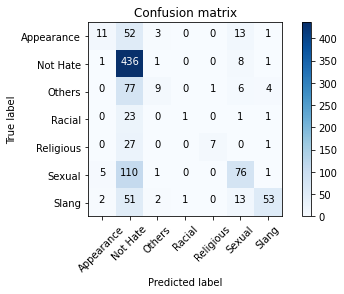

In [ ]:
from sklearn.linear_model import LogisticRegression
lgc=LogisticRegression()
lgc.fit(X_train,y_train)
pred = lgc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, pred, average='weighted')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Appearance', 'Not Hate', 'Others', 'Racial', 'Religious', 'Sexual', 'Slang'])

accuracy:   0.53
precision: 0.6174878580632372
recall: 0.532
fscore: 0.42956404473001547
support: None
Confusion matrix, without normalization


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


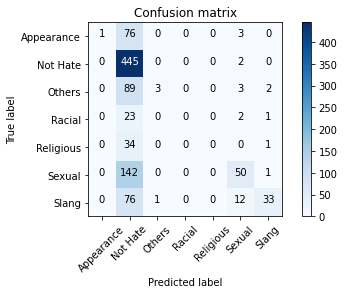

In [ ]:
### MultinomialNB Algorithm

from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
MNB.fit(X_train, y_train)
pred = MNB.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, pred, average='weighted')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Appearance', 'Not Hate', 'Others', 'Racial', 'Religious', 'Sexual', 'Slang'])

accuracy:   0.46
precision: 0.48012471464804785
recall: 0.456
fscore: 0.4658709079821567
support: None
Confusion matrix, without normalization


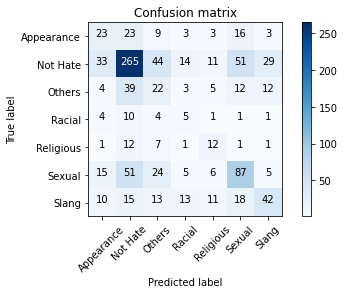

In [ ]:
### GaussianNB Algorithm

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
pred = GNB.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, pred, average='weighted')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Appearance', 'Not Hate', 'Others', 'Racial', 'Religious', 'Sexual', 'Slang'])

accuracy:   0.46
precision: 0.3309738461538461
recall: 0.464
fscore: 0.3116975881493715
support: None
Confusion matrix, without normalization


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


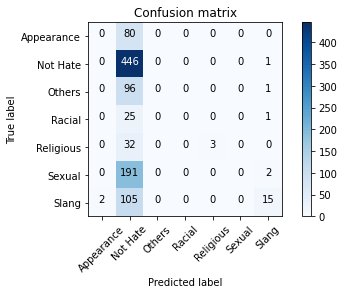

In [ ]:
### DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(max_depth=3)
dc.fit(X_train, y_train)
pred = dc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, pred, average='weighted')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Appearance', 'Not Hate', 'Others', 'Racial', 'Religious', 'Sexual', 'Slang'])

accuracy:   0.475
precision: 0.3509620926264928
recall: 0.475
fscore: 0.34520917152668573
support: None
Confusion matrix, without normalization


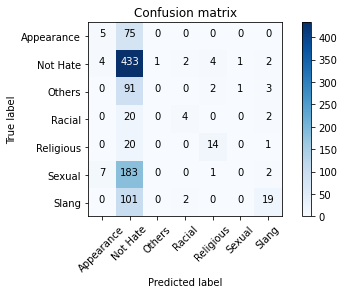

In [ ]:
### AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada= AdaBoostClassifier()
ada.fit(X_train, y_train)
pred = ada.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, pred, average='weighted')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Appearance', 'Not Hate', 'Others', 'Racial', 'Religious', 'Sexual', 'Slang'])

accuracy:   0.587
precision: 0.5904759255736022
recall: 0.587
fscore: 0.5460826430254284
support: None
Confusion matrix, without normalization


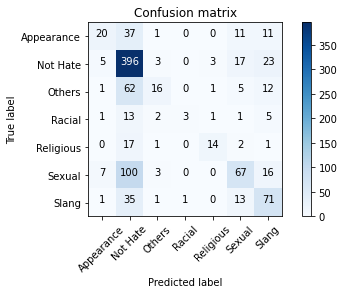

In [ ]:
### RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, pred, average='weighted')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Appearance', 'Not Hate', 'Others', 'Racial', 'Religious', 'Sexual', 'Slang'])

accuracy:   0.621
precision: 0.6265235992702585
recall: 0.621
fscore: 0.5784897195215092
support: None
Confusion matrix, without normalization


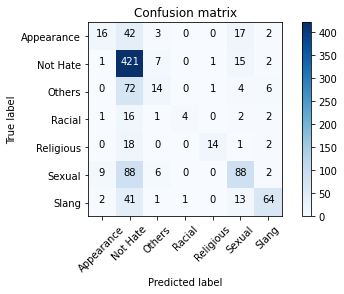

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=1,kernel='linear',gamma = 'auto',probability=True)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, pred, average='weighted')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Appearance', 'Not Hate', 'Others', 'Racial', 'Religious', 'Sexual', 'Slang'])